In [ ]:
# Important libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

#for Accuracy and Loss Graph
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.12.0'

In [ ]:
train_data_path = '/content/drive/MyDrive/dataset/train'
validation_data_path = '/content/drive/MyDrive/dataset/val'

In [ ]:
# show augmented images
def plotimages1(images_arr):
  fig, axes = plt.subplot(2,1, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)

  plt.tight.layout()
  plt.show()

In [ ]:
# this is image augmentation configuration we will use for training
training_data= keras.utils.image_dataset_from_directory(train_data_path,
                                                         labels='inferred',
                                                         label_mode='int',
                                                         class_names=None,
                                                         color_mode='rgb',
                                                         batch_size=32,
                                                         image_size=(150, 150),
                                                         shuffle=True,
                                                         seed=123,
                                                         validation_split=0.2,
                                                         subset='training',
                                                         interpolation='bilinear',
                                                         follow_links=False,
                                                         crop_to_aspect_ratio=False)

Found 1951 files belonging to 4 classes.
Using 1561 files for training.


In [ ]:
# training_data = training_data_gen.flow_from_directory(train_data_path,
#                                                       target_size=(150,150),
#                                                       batch_size=32,
#                                                       class_mode='binary')

In [ ]:
class_name  = training_data.class_names
class_name

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [ ]:
# this is the augmentation configuration we will use for validation
# only rescaling
valid_data = keras.utils.image_dataset_from_directory(validation_data_path,
                                                      image_size=(150,150),
                                                      subset='validation',
                                                      validation_split=0.2,
                                                      seed=123,
                                                      batch_size=32,)

Found 324 files belonging to 4 classes.
Using 64 files for validation.


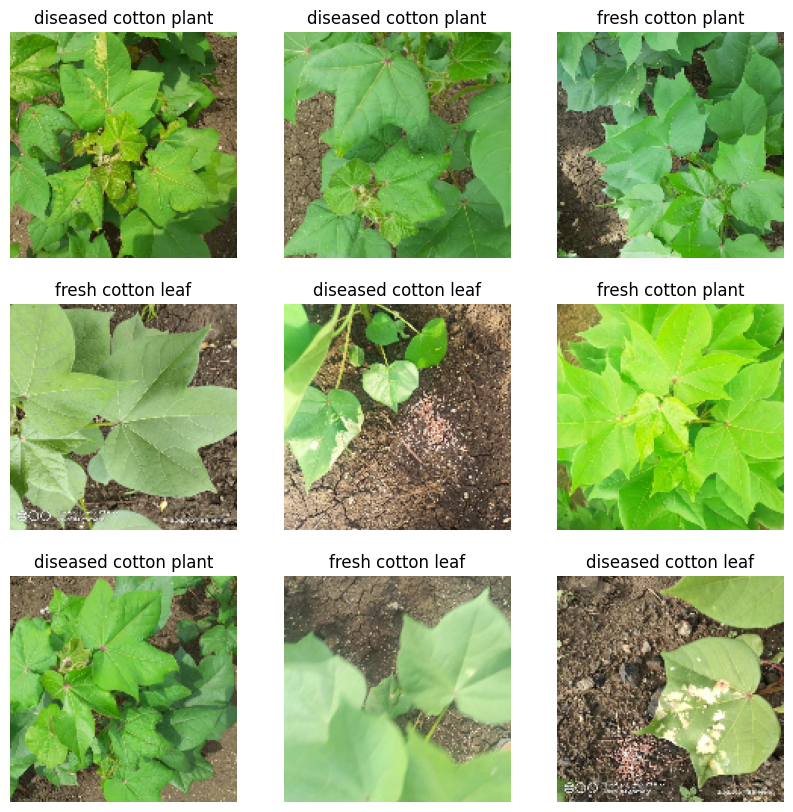

In [ ]:
#plot images
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

# **Convolutional Neural Network (CNN) Model Building**

In [ ]:
model = keras.models.Sequential([
                        keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Conv2D(filters=64, kernel_size=3),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Conv2D(filters=128, kernel_size=3),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Conv2D(filters=256, kernel_size=3),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),

                        keras.layers.Dropout(0,5),
                        keras.layers.Flatten(),  # Neural Network Building
                        keras.layers.Dense(units=128, activation='relu'), # input layer
                        keras.layers.Dropout(0.1),
                        keras.layers.Dense(units=256, activation='relu'),
                        keras.layers.Dropout(0.25),
                        keras.layers.Dense(units=4, activation='softmax')  # Output layer
    ])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/dataset/cotton_plant_disease/pred_cotton_plant_disease_cnn_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Train cnn model
history = model.fit(training_data,
                    epochs=500,
                    verbose=1,
                    validation_data = valid_data,
                    callbacks=callbacks_list)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 [==============================] - ETA: 0s - loss: 6.6355 - accuracy: 0.3799
Epoch 1: val_accuracy improved from -inf to 0.42188, saving model to /content/drive/MyDrive/dataset/cotton_plant_disease/pred_cotton_plant_disease_cnn_model.h5
49/49 [==============================] - 148s 3s/step - loss: 6.6355 - accuracy: 0.3799 - val_loss: 1.2401 - val_accuracy: 0.4219
Epoch 2/200
49/49 [==============================] - ETA: 0s - loss: 1.2337 - accuracy: 0.4965
Epoch 2: val_accuracy improved from 0.42188 to 0.59375, saving model to /content/drive/MyDrive/dataset/cotton_plant_disease/pred_cotton_plant_disease_cnn_model.h5
49/49 [==============================] - 113s 2s/step - loss: 1.2337 - accuracy: 0.4965 - val_loss: 1.0559 - val_accuracy: 0.5938
Epoch 3/200
49/49 [==============================] - ETA: 0s - loss: 1.1144 - accuracy: 0.5548
Epoch 3: val_accuracy improved from 0.59375 to 0.62500, saving model to /content/drive/MyDrive/dataset/cotton_plant_disease/pred_cotton_plant_di

In [ ]:
# shape of images
for image_batch,labels_batch in training_data:
  print(image_batch.shape,labels_batch.shape)
  break

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy',color='green')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right')
plt.show()

In [ ]:
print(history.history['loss'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',color='red',fontsize=15)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
model.save('nt/drive/MyDrive/dataset/manual_save_model/pred_cotton_plant_disease_cnn_model.h5')

In [ ]:
# predict img

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/dataset/cotton_plant_disease/pred_cotton_plant_disease_cnn_model.h5')

In [ ]:
import numpy as np

def get_give(img_path):
  test_img = keras.utils.load_img(img_path,target_size=(150,150))
  # after loading img give for np array conversion and normalize
  test_img = keras.utils.img_to_array(test_img)/255
  test_img = np.expand_dims(test_img,axis=0) #chenge dimensions 3D to 4D

  # predict image
  result = model.predict(test_img)
  pred = np.argmax(result)  # get the index of max value

  if pred==0:
    return 'healthy Cotton plant', 'healthy_leaf.html'  # index 0 for burned leaf
  elif pred==1:
    return 'disease cotton plant', 'disease.html'     # index 1 for disease plant
  elif pred==2:
    return 'healthy cotton plant', 'healthy.html'     # index 2 for healthy plant
  else:
    return 'healthy cotton plant','healthy.html'



get_give('/content/drive/MyDrive/dataset/test/diseased cotton plant/dd (706).jpg')

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'/content/drive/MyDrive/dataset/pic_mod.pkl')
joblib.dump(model,'/content/drive/MyDrive/dataset/pic_mod.joblib')